# Week 4: Blocking and Clustering 

This week we talk about blocking and clustering. This short notebook presents both a glimpse when we can see the data, as well as a few tools. 

To start, we're going to have to create some kind of strange data. We're using data of this form because it makes viewing what is happening in the blocking somewhat more clear. The data will have four quadrants, basically a high and a low level for each of two variables that I'm calling `x1` and `x2`. 

In [14]:
install.packages("blockTools")
library(data.table)

rm(list = ls())

d <- data.table(id = 1:1000, key = "id")

xs <- c(rnorm(500, mean = 10, sd = 5), rnorm(500, mean = 30, sd = 5))
xs <- cbind(xs, c(rnorm(250, mean = 10, sd = 5), rnorm(250, mean = 30, sd = 5),
                  rnorm(250, mean = 10, sd = 5), rnorm(250, mean = 30, sd = 5) )
            )
plot(xs)

ERROR: Error in contrib.url(repos, type): trying to use CRAN without setting a mirror


In [5]:
# attach to the data.table 
d[ , ':='(x1 = xs[,1],
          x2 = xs[,2]
          )
  ]
# print the data table 
head(d)

,id,x1,x2
1,1,17.9450219013595,9.30945432121596
2,2,19.6904872906719,8.73918096978923
3,3,2.58044730950758,1.47356209734292
4,4,11.8983231929093,4.22841133276046
5,5,8.97222862814461,7.28895175772303
6,6,6.22971167730168,5.26347338691227
7,7,9.04088633616651,15.2561020834641
8,8,9.30718790115755,11.1401881300529
9,9,2.82721813483407,16.2420890151871
10,10,0.292640475888149,4.88886978166878


,id,x1,x2
1,1.0000,17.9450,9.3095
2,2.0000,19.6905,8.7392
3,3.0000,2.5804,1.4736
4,4.0000,11.8983,4.2284
5,5.0000,8.9722,7.2890
6,6.0000,6.2297,5.2635


Now we can start creating the potential outcomes data in a way that is visible. 

In [6]:
d[ , y0 := x1 + rnorm(.N, .4)]
d[ , tau := rnorm(.N, 2)]
d[ , y1 := y0 + tau]
d[ , treat := sample(0:1, size = .N, replace = TRUE)]
d[ , Y := ifelse(treat == 1, y1, y0)]

d

,id,x1,x2,y0
1,1,17.9450219013595,9.30945432121596,18.7407376657904
2,2,19.6904872906719,8.73918096978923,19.7442747127444
3,3,2.58044730950758,1.47356209734292,2.37975419535747
4,4,11.8983231929093,4.22841133276046,11.379787651573
5,5,8.97222862814461,7.28895175772303,9.3701475457986
6,6,6.22971167730168,5.26347338691227,10.0345074895585
7,7,9.04088633616651,15.2561020834641,8.83749611399136
8,8,9.30718790115755,11.1401881300529,10.9275348588977
9,9,2.82721813483407,16.2420890151871,4.65988427511763
10,10,0.292640475888149,4.88886978166878,0.846369160878731


,id,x1,x2,y0,tau
1,1,17.9450219013595,9.30945432121596,18.7407376657904,1.68124851628404
2,2,19.6904872906719,8.73918096978923,19.7442747127444,1.97104944252027
3,3,2.58044730950758,1.47356209734292,2.37975419535747,1.05252971216979
4,4,11.8983231929093,4.22841133276046,11.379787651573,2.44900484062511
5,5,8.97222862814461,7.28895175772303,9.3701475457986,2.78349924574617
6,6,6.22971167730168,5.26347338691227,10.0345074895585,1.00927630390786
7,7,9.04088633616651,15.2561020834641,8.83749611399136,1.8489675643931
8,8,9.30718790115755,11.1401881300529,10.9275348588977,0.421310905917814
9,9,2.82721813483407,16.2420890151871,4.65988427511763,3.34094292019032
10,10,0.292640475888149,4.88886978166878,0.846369160878731,3.24809123198499


,id,x1,x2,y0,tau,y1
1,1,17.9450219013595,9.30945432121596,18.7407376657904,1.68124851628404,20.4219861820745
2,2,19.6904872906719,8.73918096978923,19.7442747127444,1.97104944252027,21.7153241552647
3,3,2.58044730950758,1.47356209734292,2.37975419535747,1.05252971216979,3.43228390752726
4,4,11.8983231929093,4.22841133276046,11.379787651573,2.44900484062511,13.8287924921982
5,5,8.97222862814461,7.28895175772303,9.3701475457986,2.78349924574617,12.1536467915448
6,6,6.22971167730168,5.26347338691227,10.0345074895585,1.00927630390786,11.0437837934664
7,7,9.04088633616651,15.2561020834641,8.83749611399136,1.8489675643931,10.6864636783845
8,8,9.30718790115755,11.1401881300529,10.9275348588977,0.421310905917814,11.3488457648155
9,9,2.82721813483407,16.2420890151871,4.65988427511763,3.34094292019032,8.00082719530795
10,10,0.292640475888149,4.88886978166878,0.846369160878731,3.24809123198499,4.09446039286372


,id,x1,x2,y0,tau,y1,treat
1,1,17.9450219013595,9.30945432121596,18.7407376657904,1.68124851628404,20.4219861820745,1
2,2,19.6904872906719,8.73918096978923,19.7442747127444,1.97104944252027,21.7153241552647,1
3,3,2.58044730950758,1.47356209734292,2.37975419535747,1.05252971216979,3.43228390752726,1
4,4,11.8983231929093,4.22841133276046,11.379787651573,2.44900484062511,13.8287924921982,0
5,5,8.97222862814461,7.28895175772303,9.3701475457986,2.78349924574617,12.1536467915448,0
6,6,6.22971167730168,5.26347338691227,10.0345074895585,1.00927630390786,11.0437837934664,1
7,7,9.04088633616651,15.2561020834641,8.83749611399136,1.8489675643931,10.6864636783845,1
8,8,9.30718790115755,11.1401881300529,10.9275348588977,0.421310905917814,11.3488457648155,1
9,9,2.82721813483407,16.2420890151871,4.65988427511763,3.34094292019032,8.00082719530795,1
10,10,0.292640475888149,4.88886978166878,0.846369160878731,3.24809123198499,4.09446039286372,0


,id,x1,x2,y0,tau,y1,treat,Y
1,1,17.9450219013595,9.30945432121596,18.7407376657904,1.68124851628404,20.4219861820745,1,20.4219861820745
2,2,19.6904872906719,8.73918096978923,19.7442747127444,1.97104944252027,21.7153241552647,1,21.7153241552647
3,3,2.58044730950758,1.47356209734292,2.37975419535747,1.05252971216979,3.43228390752726,1,3.43228390752726
4,4,11.8983231929093,4.22841133276046,11.379787651573,2.44900484062511,13.8287924921982,0,11.379787651573
5,5,8.97222862814461,7.28895175772303,9.3701475457986,2.78349924574617,12.1536467915448,0,9.3701475457986
6,6,6.22971167730168,5.26347338691227,10.0345074895585,1.00927630390786,11.0437837934664,1,11.0437837934664
7,7,9.04088633616651,15.2561020834641,8.83749611399136,1.8489675643931,10.6864636783845,1,10.6864636783845
8,8,9.30718790115755,11.1401881300529,10.9275348588977,0.421310905917814,11.3488457648155,1,11.3488457648155
9,9,2.82721813483407,16.2420890151871,4.65988427511763,3.34094292019032,8.00082719530795,1,8.00082719530795
10,10,0.292640475888149,4.88886978166878,0.846369160878731,3.24809123198499,4.09446039286372,0,0.846369160878731


,id,x1,x2,y0,tau,y1,treat,Y
1,1,17.9450219013595,9.30945432121596,18.7407376657904,1.68124851628404,20.4219861820745,1,20.4219861820745
2,2,19.6904872906719,8.73918096978923,19.7442747127444,1.97104944252027,21.7153241552647,1,21.7153241552647
3,3,2.58044730950758,1.47356209734292,2.37975419535747,1.05252971216979,3.43228390752726,1,3.43228390752726
4,4,11.8983231929093,4.22841133276046,11.379787651573,2.44900484062511,13.8287924921982,0,11.379787651573
5,5,8.97222862814461,7.28895175772303,9.3701475457986,2.78349924574617,12.1536467915448,0,9.3701475457986
6,6,6.22971167730168,5.26347338691227,10.0345074895585,1.00927630390786,11.0437837934664,1,11.0437837934664
7,7,9.04088633616651,15.2561020834641,8.83749611399136,1.8489675643931,10.6864636783845,1,10.6864636783845
8,8,9.30718790115755,11.1401881300529,10.9275348588977,0.421310905917814,11.3488457648155,1,11.3488457648155
9,9,2.82721813483407,16.2420890151871,4.65988427511763,3.34094292019032,8.00082719530795,1,8.00082719530795
10,10,0.292640475888149,4.88886978166878,0.846369160878731,3.24809123198499,4.09446039286372,0,0.846369160878731


We wouldn't actually get all this data in the real world. In the real world, we would be able to observe only `d.rw` for data.real-world, which would have the outcome (the realized potential outcomes), the x vars, and the treatment assignments. 

In [7]:
d.rw <- d[ , .(Y, x1, x2, treat)]
d.rw

,Y,x1,x2,treat
1,20.4219861820745,17.9450219013595,9.30945432121596,1
2,21.7153241552647,19.6904872906719,8.73918096978923,1
3,3.43228390752726,2.58044730950758,1.47356209734292,1
4,11.379787651573,11.8983231929093,4.22841133276046,0
5,9.3701475457986,8.97222862814461,7.28895175772303,0
6,11.0437837934664,6.22971167730168,5.26347338691227,1
7,10.6864636783845,9.04088633616651,15.2561020834641,1
8,11.3488457648155,9.30718790115755,11.1401881300529,1
9,8.00082719530795,2.82721813483407,16.2420890151871,1
10,0.846369160878731,0.292640475888149,4.88886978166878,0


And now we can quickly calculate the average treatment effect by calculating the mean of the realized potential outcomes, grouped by `treat`, and then taking the difference of those outcomes.

In [10]:
ate <- d[ , .(m = mean(Y)),
         keyby = treat][ ,
             diff(m)]
sprintf("The ate is %.2f.", ate)

[1] "The ate is 2.64."

We now work through a randomization inference loop for the data. 
- Presume the sharp null hypothesis (so that we can observe the full schedule of potential outcomes) 
- With the realized values, shuffle the treatment and control assignments 
- With those shuffled assignments, calculate the ATE
- Store them somewhere 

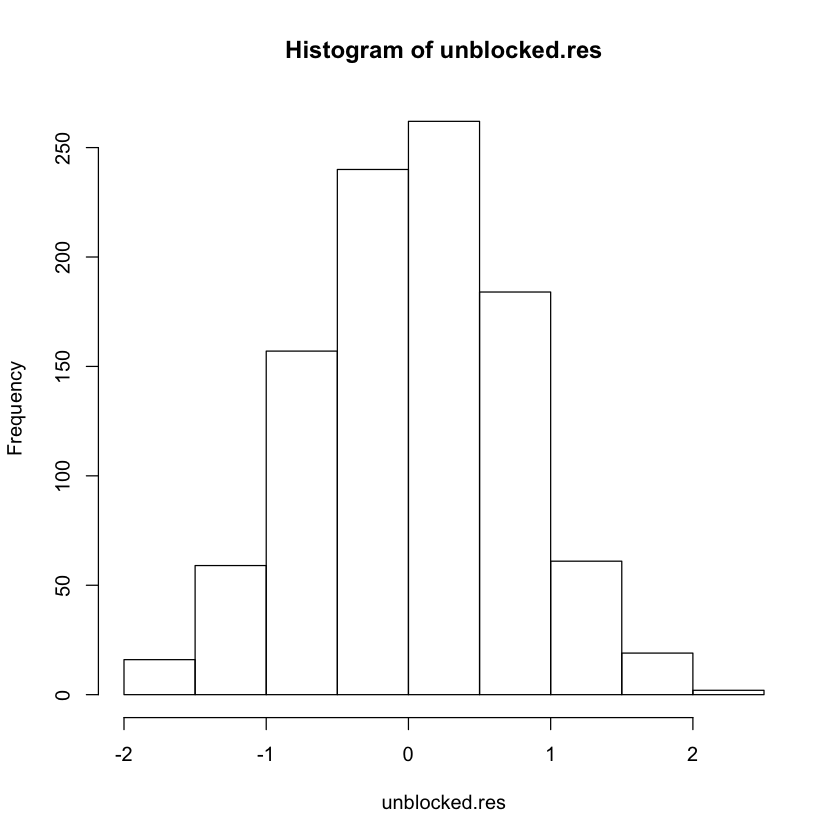

In [11]:
unblocked.res <- rep(NA, 1000)
for(i in 1:1000) {
    unblocked.res[i] <- d[ , .(treat = sample(treat),
                     Y = Y)][ ,
                         .(m = mean(Y)),
                         keyby = .(treat)][ ,
                             diff(m)]
}

hist(unblocked.res)

# Block Tools 
At this point, we can demonstrate one of the blocking solutions that has been written for R. While we could  very likely do this after taking at ML class, or even just thinking about it for a few minutes, someone else has already thought about it for us. 

We'll start by creating data in the same ways as before. But now, before we step in to start the randomization procedure, we're going to create blocks of size two, and then we will randomly assign with in the blocks. 

In [18]:
## blocktools
# install.packages("blockTools", repos='http://cran.us.r-project.org')
library(blockTools)

In [19]:
d <- data.table(id = 1:1000, key = "id")

xs <- c(rnorm(500, mean = 10, sd = 5), rnorm(500, mean = 30, sd = 5))
xs <- cbind(xs, c(rnorm(250, mean = 10, sd = 5), rnorm(250, mean = 30, sd = 5),
                  rnorm(250, mean = 10, sd = 5), rnorm(250, mean = 30, sd = 5) )
            )

d[ , ':='(x1 = xs[,1],
          x2 = xs[,2]
          )
  ]

d[ , y0 := x1 + rnorm(.N, .4)]
d[ , tau := rnorm(.N, 2)]
d[ , y1 := y0 + tau]

## blocktools implementation 
blocked.data <- block(data = d, id.vars = c("id"), block.vars = c("x1"))
## blocked.data <- block(data = d, id.vars = c("id"), n
assignment(blocked.data)
d[ , block := createBlockIDs(obj = blocked.data, data = d, id.var = "id")]

setkeyv(d, cols = "block")
## assign treatment by block 
d[ , treat := sample(0:1), by = block]

d[ , Y := ifelse(treat == 1, y1, y0)]

setkeyv(d, cols = c("block", "id"))

,id,x1,x2
1,1,7.54244884371709,7.22908960112583
2,2,14.1181432488931,6.91487022498947
3,3,6.99005079220056,10.8987030285724
4,4,5.57942214062767,6.05160736548155
5,5,20.4510519722206,5.5524543096509
6,6,25.4315968577417,9.8581025886539
7,7,4.80613585571394,13.3571543237797
8,8,7.50533118975823,7.50791174480237
9,9,15.3482897268674,5.81998212157097
10,10,8.15649738232655,9.31585668912531


,id,x1,x2,y0
1,1,7.54244884371709,7.22908960112583,7.05084974382079
2,2,14.1181432488931,6.91487022498947,14.7844131602424
3,3,6.99005079220056,10.8987030285724,6.84770086180139
4,4,5.57942214062767,6.05160736548155,5.22317282298423
5,5,20.4510519722206,5.5524543096509,20.438342630177
6,6,25.4315968577417,9.8581025886539,24.9396989598123
7,7,4.80613585571394,13.3571543237797,4.5547406026744
8,8,7.50533118975823,7.50791174480237,7.88679684348704
9,9,15.3482897268674,5.81998212157097,15.5172320413558
10,10,8.15649738232655,9.31585668912531,8.79804559157016


,id,x1,x2,y0,tau
1,1,7.54244884371709,7.22908960112583,7.05084974382079,3.56041970411168
2,2,14.1181432488931,6.91487022498947,14.7844131602424,2.21106614096783
3,3,6.99005079220056,10.8987030285724,6.84770086180139,2.33716112261539
4,4,5.57942214062767,6.05160736548155,5.22317282298423,3.41260910437816
5,5,20.4510519722206,5.5524543096509,20.438342630177,1.22211084944442
6,6,25.4315968577417,9.8581025886539,24.9396989598123,2.27251509902758
7,7,4.80613585571394,13.3571543237797,4.5547406026744,1.73529614486495
8,8,7.50533118975823,7.50791174480237,7.88679684348704,3.01100302305102
9,9,15.3482897268674,5.81998212157097,15.5172320413558,2.3720092548139
10,10,8.15649738232655,9.31585668912531,8.79804559157016,1.32316859803596


,id,x1,x2,y0,tau,y1
1,1,7.54244884371709,7.22908960112583,7.05084974382079,3.56041970411168,10.6112694479325
2,2,14.1181432488931,6.91487022498947,14.7844131602424,2.21106614096783,16.9954793012102
3,3,6.99005079220056,10.8987030285724,6.84770086180139,2.33716112261539,9.18486198441678
4,4,5.57942214062767,6.05160736548155,5.22317282298423,3.41260910437816,8.63578192736238
5,5,20.4510519722206,5.5524543096509,20.438342630177,1.22211084944442,21.6604534796214
6,6,25.4315968577417,9.8581025886539,24.9396989598123,2.27251509902758,27.2122140588399
7,7,4.80613585571394,13.3571543237797,4.5547406026744,1.73529614486495,6.29003674753935
8,8,7.50533118975823,7.50791174480237,7.88679684348704,3.01100302305102,10.8977998665381
9,9,15.3482897268674,5.81998212157097,15.5172320413558,2.3720092548139,17.8892412961697
10,10,8.15649738232655,9.31585668912531,8.79804559157016,1.32316859803596,10.1212141896061



Assignments:

     Treatment 1  Treatment 2  Distance  
1    241          8            1.3722e-07
2    127          396          2.0781e-07
3    4            102          3.3749e-06
4    770          518          3.4427e-06
5    975          717          4.5285e-06
6    199          315          6.5230e-06
7    474          294          2.3443e-05
8    619          646          2.9425e-05
9    584          807          3.0726e-05
10   642          757          3.5820e-05
11   159          173          4.1594e-05
12   792          729          4.6862e-05
13   55           21           5.1460e-05
14   688          855          5.8494e-05
15   571          617          6.1451e-05
16   290          62           6.4103e-05
17   660          581          6.9593e-05
18   823          761          7.0883e-05
19   551          870          7.4483e-05
20   674          996          7.4624e-05
21   226          480          7.5372e-05
22   398          486          8.1645e-05
23   275          5

,id,x1,x2,y0,tau,y1,block
1,1,7.54244884371709,7.22908960112583,7.05084974382079,3.56041970411168,10.6112694479325,38
2,2,14.1181432488931,6.91487022498947,14.7844131602424,2.21106614096783,16.9954793012102,58
3,3,6.99005079220056,10.8987030285724,6.84770086180139,2.33716112261539,9.18486198441678,101
4,4,5.57942214062767,6.05160736548155,5.22317282298423,3.41260910437816,8.63578192736238,3
5,5,20.4510519722206,5.5524543096509,20.438342630177,1.22211084944442,21.6604534796214,306
6,6,25.4315968577417,9.8581025886539,24.9396989598123,2.27251509902758,27.2122140588399,221
7,7,4.80613585571394,13.3571543237797,4.5547406026744,1.73529614486495,6.29003674753935,300
8,8,7.50533118975823,7.50791174480237,7.88679684348704,3.01100302305102,10.8977998665381,1
9,9,15.3482897268674,5.81998212157097,15.5172320413558,2.3720092548139,17.8892412961697,269
10,10,8.15649738232655,9.31585668912531,8.79804559157016,1.32316859803596,10.1212141896061,320


,id,x1,x2,y0,tau,y1,block,treat
1,8,7.50533118975823,7.50791174480237,7.88679684348704,3.01100302305102,10.8977998665381,1,0
2,241,7.50533275059468,10.2205675151111,8.35934068966514,2.29385541180199,10.6531961014671,1,1
3,127,6.55278967078902,6.10889854104696,8.36702289430077,2.30799257322067,10.6750154675214,2,1
4,396,6.55279203463346,39.1170175055633,8.27695044933271,0.581967278352836,8.85891772768555,2,0
5,4,5.57942214062767,6.05160736548155,5.22317282298423,3.41260910437816,8.63578192736238,3,0
6,102,5.57946052967228,14.3351599418255,6.18298976542821,2.79170149309322,8.97469125852143,3,1
7,518,18.5319063427192,1.85947907306438,16.9493043975522,1.60234758404249,18.5516519815947,4,0
8,770,18.531867182414,27.1338947482213,19.2536032414402,1.07539192897065,20.3289951704108,4,1
9,717,32.5038204402589,4.94726470057972,32.4765277654027,1.94077777475603,34.4173055401587,5,1
10,975,32.5038719513984,32.5334641256592,32.497571315455,1.78886508817005,34.2864364036251,5,0


,id,x1,x2,y0,tau,y1,block,treat,Y
1,8,7.50533118975823,7.50791174480237,7.88679684348704,3.01100302305102,10.8977998665381,1,0,7.88679684348704
2,241,7.50533275059468,10.2205675151111,8.35934068966514,2.29385541180199,10.6531961014671,1,1,10.6531961014671
3,127,6.55278967078902,6.10889854104696,8.36702289430077,2.30799257322067,10.6750154675214,2,1,10.6750154675214
4,396,6.55279203463346,39.1170175055633,8.27695044933271,0.581967278352836,8.85891772768555,2,0,8.27695044933271
5,4,5.57942214062767,6.05160736548155,5.22317282298423,3.41260910437816,8.63578192736238,3,0,5.22317282298423
6,102,5.57946052967228,14.3351599418255,6.18298976542821,2.79170149309322,8.97469125852143,3,1,8.97469125852143
7,518,18.5319063427192,1.85947907306438,16.9493043975522,1.60234758404249,18.5516519815947,4,0,16.9493043975522
8,770,18.531867182414,27.1338947482213,19.2536032414402,1.07539192897065,20.3289951704108,4,1,20.3289951704108
9,717,32.5038204402589,4.94726470057972,32.4765277654027,1.94077777475603,34.4173055401587,5,1,34.4173055401587
10,975,32.5038719513984,32.5334641256592,32.497571315455,1.78886508817005,34.2864364036251,5,0,32.497571315455


First, let's show the first 10 rows of the data, and then we will show the control points and the matched treatment points in the blocked space. Because we have a lot of data that is continuously distributed, we are able to generate really nice blocks of two. 

In these blocks, the Xs represent the control units, the dots represent the treatment units, and the colors represent blocks; plot characters that are the same color are placed into the same group. 

In [21]:
d[block < 10, ]

,id,x1,x2,y0,tau,y1,block,treat,Y
1,8.0000,7.5053,7.5079,7.8868,3.0110,10.8978,1.0000,0.0000,7.8868
2,241.0000,7.5053,10.2206,8.3593,2.2939,10.6532,1.0000,1.0000,10.6532
3,127.0000,6.5528,6.1089,8.3670,2.3080,10.6750,2.0000,1.0000,10.6750
4,396.00000,6.55279,39.11702,8.27695,0.58197,8.85892,2.00000,0.00000,8.27695
5,4.0000,5.5794,6.0516,5.2232,3.4126,8.6358,3.0000,0.0000,5.2232
6,102.0000,5.5795,14.3352,6.1830,2.7917,8.9747,3.0000,1.0000,8.9747
7,518.0000,18.5319,1.8595,16.9493,1.6023,18.5517,4.0000,0.0000,16.9493
8,770.0000,18.5319,27.1339,19.2536,1.0754,20.3290,4.0000,1.0000,20.3290
9,717.0000,32.5038,4.9473,32.4765,1.9408,34.4173,5.0000,1.0000,34.4173
10,975.0000,32.5039,32.5335,32.4976,1.7889,34.2864,5.0000,0.0000,32.4976


NULL

NULL

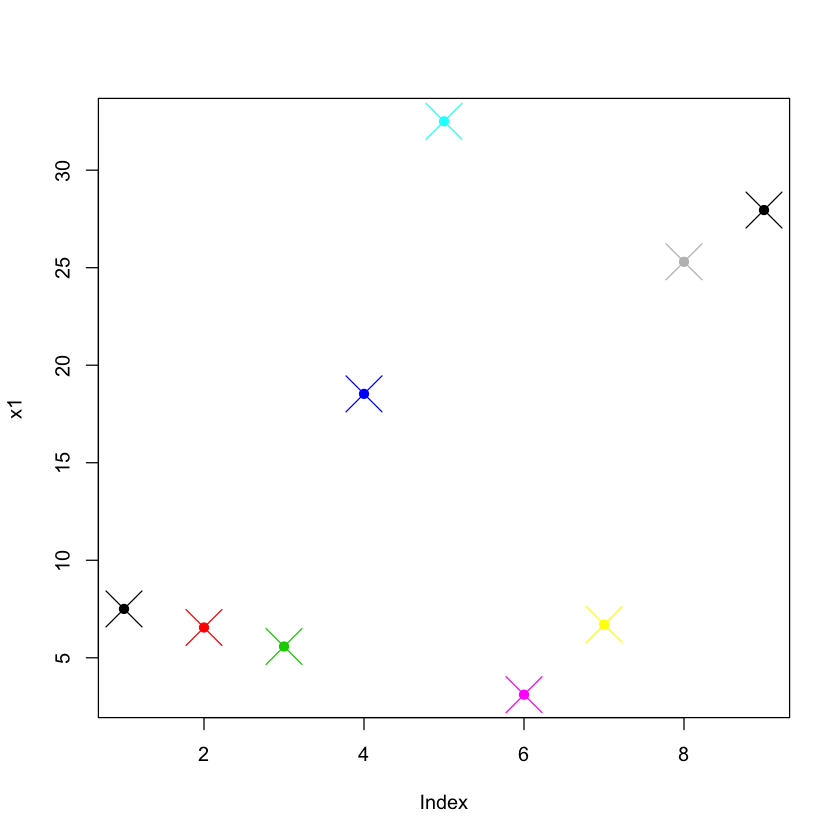

In [22]:
d[block < 10 & treat == 0, plot(x1, col = block, pch = 4, cex = 4)]
d[block < 10 & treat == 1, points(x1, col = block, pch = 19)]

Similar to before, we can just use randomization inference to calculate a distribution under the sharp null hypothesis. But, we can also run the same RI algorithm, but with block random assignments. In this case, the `blocked.res` object will take the results of the block random assignment. Note that to produce this, the assignment is taking a `Y=Y` argument to pull forward to the next step in the chain, and also that in the sampling call, we are sampling by block. 

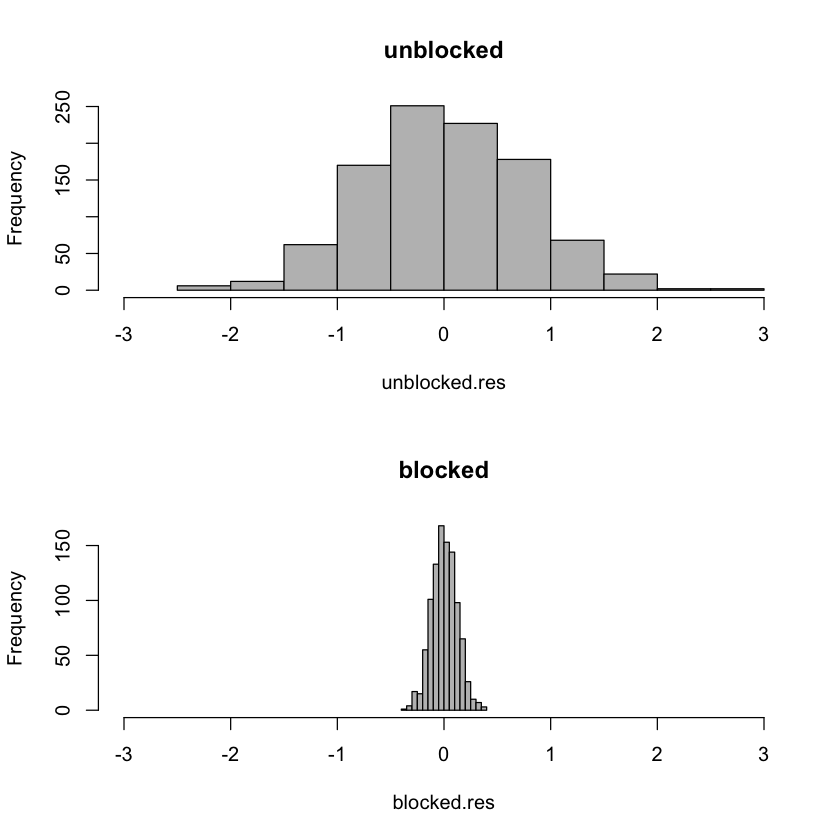

In [23]:
unblocked.res <- rep(NA, 1000)
blocked.res <- rep(NA, 1000)

for(i in 1:1000) {
    unblocked.res[i] <- d[ , .(treat = sample(treat),
                     Y = Y)][ ,
                         .(m = mean(Y)),
                         keyby = .(treat)][ ,
                             diff(m)]
}
    
for(i in 1:1000) {
    blocked.res[i] <- d[ , .(treat = sample(treat),
                     Y=Y),
                        by = block][ ,
                            .(m = mean(Y)),
                            keyby = .(treat)][ , diff(m)]
}

par(mfrow = c(2,1))
hist(unblocked.res, col = "grey", main = "unblocked", xlim = c(-3, 3))
hist(blocked.res, col = "grey", main = "blocked", xlim = c(-3, 3))

Think about these distributions above: Which distribution is a higher powered test of the average treatment effect, and what part of the blocking algorithm that we've shown makes it so? 

# Blocking on Two Dimensions 
At the point, we can really easily expand the blocking to include more than a single dimension. All we have to do is include another argument in the blocking variables call. (I *will* note that in the code I'm going to change the relationship between `x2` and `Y` such that there *is* now a relationship. 

In [31]:
library(blockTools)

d <- data.table(id = 1:1000, key = "id")

xs <- c(rnorm(500, mean = 10, sd = 5), rnorm(500, mean = 30, sd = 5))
xs <- cbind(xs, c(rnorm(250, mean = 10, sd = 5), rnorm(250, mean = 30, sd = 5),
                  rnorm(250, mean = 10, sd = 5), rnorm(250, mean = 30, sd = 5) )
            )

d[ , ':='(x1 = xs[,1],
          x2 = xs[,2]
          )
  ]

d[ , y0 := x1 - 2 *x2 + rnorm(.N, .4)]
d[ , tau := rnorm(.N, 2)]
d[ , y1 := y0 + tau]

,id,x1,x2
1,1,5.60915039290222,12.2878613950861
2,2,10.6284532941278,9.66807971228218
3,3,15.0347764283748,13.0320916009192
4,4,12.4721783467994,7.25193628069554
5,5,11.9032368055352,14.5528571655929
6,6,3.81230611131729,10.2483357621991
7,7,17.1444324561809,8.14764259441627
8,8,9.79972181402912,11.5809717910492
9,9,13.749182758419,18.4776991543951
10,10,13.9441850264114,13.087019721966


,id,x1,x2,y0
1,1,5.60915039290222,12.2878613950861,-19.3304451291826
2,2,10.6284532941278,9.66807971228218,-8.25497055816703
3,3,15.0347764283748,13.0320916009192,-11.0053695845139
4,4,12.4721783467994,7.25193628069554,-2.17279817861819
5,5,11.9032368055352,14.5528571655929,-17.6984309574755
6,6,3.81230611131729,10.2483357621991,-16.2298299186756
7,7,17.1444324561809,8.14764259441627,1.76842418731617
8,8,9.79972181402912,11.5809717910492,-11.1178029937912
9,9,13.749182758419,18.4776991543951,-22.3994376092913
10,10,13.9441850264114,13.087019721966,-11.8607270092967


,id,x1,x2,y0,tau
1,1,5.60915039290222,12.2878613950861,-19.3304451291826,1.39706682044233
2,2,10.6284532941278,9.66807971228218,-8.25497055816703,1.30387324041879
3,3,15.0347764283748,13.0320916009192,-11.0053695845139,1.93897487633323
4,4,12.4721783467994,7.25193628069554,-2.17279817861819,0.510819851893578
5,5,11.9032368055352,14.5528571655929,-17.6984309574755,0.966284867373474
6,6,3.81230611131729,10.2483357621991,-16.2298299186756,2.57082284109178
7,7,17.1444324561809,8.14764259441627,1.76842418731617,3.22226831822841
8,8,9.79972181402912,11.5809717910492,-11.1178029937912,2.5270685180095
9,9,13.749182758419,18.4776991543951,-22.3994376092913,4.82692474821371
10,10,13.9441850264114,13.087019721966,-11.8607270092967,-0.0264874553383949


,id,x1,x2,y0,tau,y1
1,1,5.60915039290222,12.2878613950861,-19.3304451291826,1.39706682044233,-17.9333783087403
2,2,10.6284532941278,9.66807971228218,-8.25497055816703,1.30387324041879,-6.95109731774824
3,3,15.0347764283748,13.0320916009192,-11.0053695845139,1.93897487633323,-9.06639470818068
4,4,12.4721783467994,7.25193628069554,-2.17279817861819,0.510819851893578,-1.66197832672461
5,5,11.9032368055352,14.5528571655929,-17.6984309574755,0.966284867373474,-16.732146090102
6,6,3.81230611131729,10.2483357621991,-16.2298299186756,2.57082284109178,-13.6590070775838
7,7,17.1444324561809,8.14764259441627,1.76842418731617,3.22226831822841,4.99069250554458
8,8,9.79972181402912,11.5809717910492,-11.1178029937912,2.5270685180095,-8.59073447578174
9,9,13.749182758419,18.4776991543951,-22.3994376092913,4.82692474821371,-17.5725128610776
10,10,13.9441850264114,13.087019721966,-11.8607270092967,-0.0264874553383949,-11.8872144646351



Assignments:

     Treatment 1  Treatment 2  Distance 
1    731          523          0.0029161
2    66           230          0.0033133
3    97           242          0.0036814
4    409          845          0.0049541
5    239          91           0.0049604
6    689          779          0.0050480
7    379          291          0.0052317
8    615          703          0.0063067
9    630          727          0.0073371
10   718          715          0.0076586
11   681          709          0.0080109
12   696          643          0.0081077
13   992          814          0.0081126
14   478          364          0.0085734
15   972          938          0.0087791
16   824          884          0.0088016
17   995          993          0.0090069
18   208          222          0.0102281
19   634          510          0.0107359
20   605          542          0.0111036
21   319          382          0.0111183
22   76           206          0.0122396
23   71           248          0.0122638
2

,id,x1,x2,y0,tau,y1,block
1,1,5.60915039290222,12.2878613950861,-19.3304451291826,1.39706682044233,-17.9333783087403,455
2,2,10.6284532941278,9.66807971228218,-8.25497055816703,1.30387324041879,-6.95109731774824,135
3,3,15.0347764283748,13.0320916009192,-11.0053695845139,1.93897487633323,-9.06639470818068,270
4,4,12.4721783467994,7.25193628069554,-2.17279817861819,0.510819851893578,-1.66197832672461,33
5,5,11.9032368055352,14.5528571655929,-17.6984309574755,0.966284867373474,-16.732146090102,127
6,6,3.81230611131729,10.2483357621991,-16.2298299186756,2.57082284109178,-13.6590070775838,308
7,7,17.1444324561809,8.14764259441627,1.76842418731617,3.22226831822841,4.99069250554458,437
8,8,9.79972181402912,11.5809717910492,-11.1178029937912,2.5270685180095,-8.59073447578174,245
9,9,13.749182758419,18.4776991543951,-22.3994376092913,4.82692474821371,-17.5725128610776,293
10,10,13.9441850264114,13.087019721966,-11.8607270092967,-0.0264874553383949,-11.8872144646351,155


,id,x1,x2,y0,tau,y1,block,treat
1,1,5.60915039290222,12.2878613950861,-19.3304451291826,1.39706682044233,-17.9333783087403,455,1
2,2,10.6284532941278,9.66807971228218,-8.25497055816703,1.30387324041879,-6.95109731774824,135,0
3,3,15.0347764283748,13.0320916009192,-11.0053695845139,1.93897487633323,-9.06639470818068,270,1
4,4,12.4721783467994,7.25193628069554,-2.17279817861819,0.510819851893578,-1.66197832672461,33,0
5,5,11.9032368055352,14.5528571655929,-17.6984309574755,0.966284867373474,-16.732146090102,127,1
6,6,3.81230611131729,10.2483357621991,-16.2298299186756,2.57082284109178,-13.6590070775838,308,1
7,7,17.1444324561809,8.14764259441627,1.76842418731617,3.22226831822841,4.99069250554458,437,0
8,8,9.79972181402912,11.5809717910492,-11.1178029937912,2.5270685180095,-8.59073447578174,245,1
9,9,13.749182758419,18.4776991543951,-22.3994376092913,4.82692474821371,-17.5725128610776,293,1
10,10,13.9441850264114,13.087019721966,-11.8607270092967,-0.0264874553383949,-11.8872144646351,155,0


,id,x1,x2,y0,tau,y1,block,treat,Y
1,1,5.60915039290222,12.2878613950861,-19.3304451291826,1.39706682044233,-17.9333783087403,455,1,-17.9333783087403
2,2,10.6284532941278,9.66807971228218,-8.25497055816703,1.30387324041879,-6.95109731774824,135,0,-8.25497055816703
3,3,15.0347764283748,13.0320916009192,-11.0053695845139,1.93897487633323,-9.06639470818068,270,1,-9.06639470818068
4,4,12.4721783467994,7.25193628069554,-2.17279817861819,0.510819851893578,-1.66197832672461,33,0,-2.17279817861819
5,5,11.9032368055352,14.5528571655929,-17.6984309574755,0.966284867373474,-16.732146090102,127,1,-16.732146090102
6,6,3.81230611131729,10.2483357621991,-16.2298299186756,2.57082284109178,-13.6590070775838,308,1,-13.6590070775838
7,7,17.1444324561809,8.14764259441627,1.76842418731617,3.22226831822841,4.99069250554458,437,0,1.76842418731617
8,8,9.79972181402912,11.5809717910492,-11.1178029937912,2.5270685180095,-8.59073447578174,245,1,-8.59073447578174
9,9,13.749182758419,18.4776991543951,-22.3994376092913,4.82692474821371,-17.5725128610776,293,1,-17.5725128610776
10,10,13.9441850264114,13.087019721966,-11.8607270092967,-0.0264874553383949,-11.8872144646351,155,0,-11.8607270092967


NULL

NULL

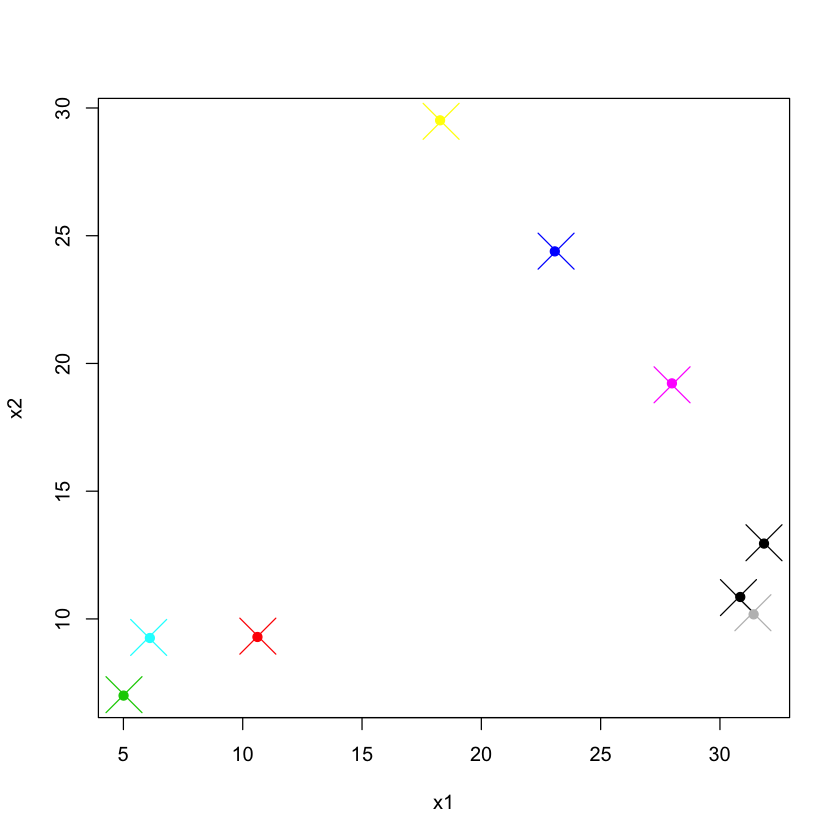

In [32]:
## blocktools implementation 
blocked.data <- block(data = d, id.vars = c("id"), block.vars = c("x1", "x2"))
## blocked.data <- block(data = d, id.vars = c("id"), n
assignment(blocked.data)

d[ , block := createBlockIDs(obj = blocked.data, data = d, id.var = "id")]

## assign treatment by block 
d[ , treat := sample(0:1), by = block]
d[ , Y := ifelse(treat == 1, y1, y0)]

setkeyv(d, cols = c("block", "id"))

d[block < 10 & treat == 0, plot(x1, x2, col = block, pch = 4, cex = 4)]
d[block < 10 & treat == 1, points(x1, x2, col = block, pch = 19)]

## this isn't actually strictly necessary for this, since the y0 is
## only conditional on the x1 value. But, we can show that we don't
## get any better performance if you went back and ran the assignment
## algorithm on the blocking on `x1` vs. blocking on `x1` and `x2`.

x2blocked.res <- rep(NA, 1000)
    
for(i in 1:1000) {
    x2blocked.res[i] <- d[ , .(treat = sample(treat),
                     Y=Y),
                        by = block][ ,
                            .(m = mean(Y)),
                            keyby = .(treat)][ , diff(m)]
}

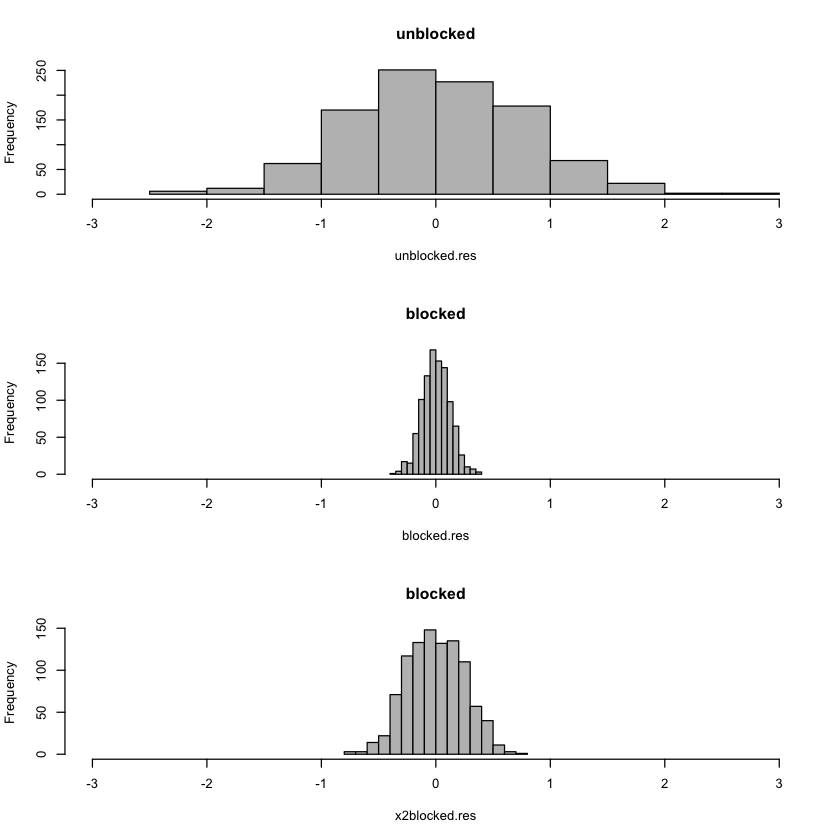

In [33]:
par(mfrow = c(3,1))
hist(unblocked.res, col = "grey", main = "unblocked", xlim = c(-3, 3))
hist(blocked.res, col = "grey", main = "blocked", xlim = c(-3, 3))
hist(x2blocked.res, col = "grey", main = "blocked", xlim = c(-3, 3))